<a href="https://colab.research.google.com/github/rayasrujanareddy/ML-KNN/blob/main/KNN_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### KNN:- 1. Implement K-NN Classifier for classification of any dataset of your choice.

### a. Load an existing data set

In [1]:
import numpy as np
import csv
import math
import matplotlib.pyplot as plt

# Load dataset, skip the first (non-numeric) column and display a few rows
def load_data(filepath, num_rows=5):
    with open(filepath, 'r') as f:
        data = list(csv.reader(f))
    # Extract headers and data separately
    headers = data[0]
    dataset = np.array([row[1:] for row in data[1:]], dtype=float)  # Skip the car name column

    # Display the headers and the first few rows of the dataset
    print("Headers:", headers[1:])  # Exclude the first header (car names)
    print("First few rows of the dataset:")
    for row in dataset[:num_rows]:
        print(row)

    return dataset

### b. Split the data set to train and test sets

In [2]:
# Split dataset into train and test sets
def split_data(dataset, test_size=0.2):
    np.random.shuffle(dataset)
    split_index = int(len(dataset) * (1 - test_size))
    train_data = dataset[:split_index]
    test_data = dataset[split_index:]
    return train_data, test_data

In [3]:
# Euclidean distance calculation
def euclidean_distance(row1, row2):
    return math.sqrt(np.sum((row1 - row2)**2))

# Get the nearest neighbors
def get_neighbors(train, test_row, k):
    distances = []
    for train_row in train:
        dist = euclidean_distance(test_row[:-1], train_row[:-1])
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = [distances[i][0] for i in range(k)]
    return neighbors

### c. Test your model using test set. Find accuracy and confusion Matrix.

In [4]:
# Make a prediction
def predict_classification(train, test_row, k):
    neighbors = get_neighbors(train, test_row, k)
    output_labels = [row[-1] for row in neighbors]
    prediction = max(set(output_labels), key=output_labels.count)
    return prediction

# Calculate accuracy
def calculate_accuracy(test_data, predictions):
    correct = sum(1 for i in range(len(test_data)) if test_data[i][-1] == predictions[i])
    return correct / len(test_data) * 100

# Confusion matrix
def confusion_matrix(test_data, predictions):
    unique_labels = np.unique([row[-1] for row in test_data])
    matrix = np.zeros((len(unique_labels), len(unique_labels)), dtype=int)
    label_to_index = {label: i for i, label in enumerate(unique_labels)}

    for i in range(len(test_data)):
        actual = label_to_index[test_data[i][-1]]
        predicted = label_to_index[predictions[i]]
        matrix[actual][predicted] += 1

    return matrix

### d. Examine the effect of the value of K on accuracy/performance. Plot the curve “k vs accuracy” and find out the value of k for maximum accuracy for the test samples.

Headers: ['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
First few rows of the dataset:
[ 21.     6.   160.   110.     3.9    2.62  16.46   0.     1.     4.
   4.  ]
[ 21.      6.    160.    110.      3.9     2.875  17.02    0.      1.
   4.      4.   ]
[ 22.8    4.   108.    93.     3.85   2.32  18.61   1.     1.     4.
   1.  ]
[ 21.4     6.    258.    110.      3.08    3.215  19.44    1.      0.
   3.      1.   ]
[ 18.7    8.   360.   175.     3.15   3.44  17.02   0.     0.     3.
   2.  ]
k=1, Accuracy=71.43%
k=2, Accuracy=71.43%
k=3, Accuracy=42.86%
k=4, Accuracy=42.86%
k=5, Accuracy=42.86%
k=6, Accuracy=28.57%
k=7, Accuracy=0.00%
k=8, Accuracy=14.29%
k=9, Accuracy=14.29%
k=10, Accuracy=14.29%


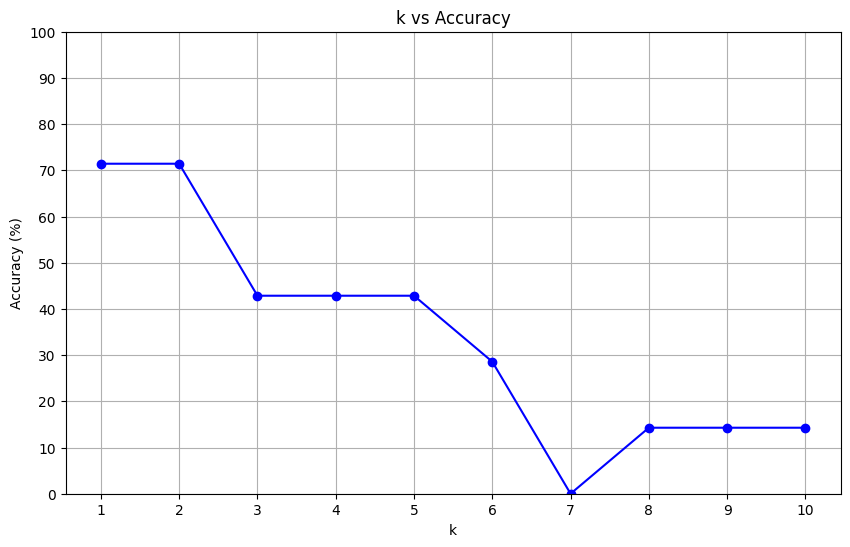

Best k: 1
Final Accuracy: 71.43%
Confusion Matrix:
[[1 1 0]
 [0 2 1]
 [0 0 2]]


In [8]:
# k vs accuracy plot
def k_vs_accuracy(train_data, test_data, max_k=10):
    accuracies = []
    for k in range(1, max_k + 1):
        predictions = [predict_classification(train_data, row, k) for row in test_data]
        accuracy = calculate_accuracy(test_data, predictions)
        accuracies.append(accuracy)
        print(f'k={k}, Accuracy={accuracy:.2f}%')
    return accuracies

# Main function
def main(filepath):
    # Load and prepare data
    dataset = load_data(filepath)
    train_data, test_data = split_data(dataset)

    # Evaluate the effect of k on accuracy
    accuracies = k_vs_accuracy(train_data, test_data, max_k=10)

    # Plot k vs accuracy
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), accuracies, marker='o', linestyle='-', color='b')
    plt.xticks(range(1, 11))
    plt.yticks(np.arange(0, 101, 10))  # Set y-ticks to range from 0 to 100
    plt.xlabel('k')
    plt.ylabel('Accuracy (%)')
    plt.title('k vs Accuracy')
    plt.grid()
    plt.ylim(0, 100)  # Set y-axis limits to 0-100%
    plt.show()

    # Use the best k to get confusion matrix and final accuracy
    best_k = np.argmax(accuracies) + 1
    print(f'Best k: {best_k}')

    final_predictions = [predict_classification(train_data, row, best_k) for row in test_data]
    accuracy = calculate_accuracy(test_data, final_predictions)
    print(f'Final Accuracy: {accuracy:.2f}%')

    matrix = confusion_matrix(test_data, final_predictions)
    print('Confusion Matrix:')
    print(matrix)

# Call the main function with the dataset path
main('/content/mtcars.csv')
